# MapReader Workshop @ ADHO DH 2025
## Text Spotting with IIIF Resources


**For use in Google Colab**
 

In [ ]:
Written by Rosie Wood and Katherine McDonough.
Reviewed and tested by Kaspar Beelen and Daniel Wilson.

Learn more about the MapReader team at https://github.com/maps-as-data/MapReader?tab=readme-ov-file#contributors. 

In [1]:
# set up for google colab - this cell will take a while to run!
!git clone https://github.com/maps-as-data/workshop-dh2025
!pip install -r workshop-dh2025/requirements.txt

!git clone https://github.com/maps-as-data/MapTextPipeline.git

Cloning into 'workshop-dh2025'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (35/35), done.
^Cceiving objects:   7% (16/217), 20.57 MiB | 10.26 MiB/s
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'workshop-dh2025/requirements.txt'


In [30]:
# enable custom widgets in colab
from google.colab import output
output.enable_custom_widget_manager()

ModuleNotFoundError: No module named 'google.colab'

# Download

In [7]:
from mapreader import IIIFDownloader

from piffle.load_iiif import load_iiif_image, load_iiif_presentation

# Georeferenced Map Example

Leventhal Map & Education Center, Boston Public Library

*Path map of the eastern part of Mount Desert Island, Maine* (1903)

https://collections.leventhalmap.org/search/commonwealth:cj82m682d

- IIF Manifest - https://collections.leventhalmap.org/search/commonwealth:cj82m682d/manifest
- Allmaps viewer - https://viewer.allmaps.org/?url=https%3A%2F%2Fannotations.allmaps.org%2Fimages%2Ff29ad52e4d2477a2
- Allmaps georeference annotation - https://annotations.allmaps.org/images/f29ad52e4d2477a2


In [11]:
# Download

downloader = IIIFDownloader(
    "https://annotations.allmaps.org/images/f29ad52e4d2477a2",
    iiif_versions=3,
    iiif_uris="https://annotations.allmaps.org/images/f29ad52e4d2477a2"
)

[WARNING] AnnotationPage is missing 'id' field.


In [12]:
downloader.save_georeferenced_maps()

  0%|          | 0/1 [00:00<?, ?it/s]

[WARNING] Image is missing 'type' field.


# Load

https://mapreader.readthedocs.io/en/latest/using-mapreader/step-by-step-guide/2-load.html

In [13]:
from mapreader import loader

In [15]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None  # Disable limit on image size


# change this path to the saved IIIF image you want to load
my_files = loader("./maps/ea5a3e20e44cea9c_masked.tif")

  0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(my_files)}")

Number of images: 1


In [17]:
print(my_files)

#images: 1

#parents: 1
ea5a3e20e44cea9c_masked.tif

#patches: 0



In [18]:
my_files.add_metadata("./maps/metadata.csv")

[INFO] Loading metadata from CSV/TSV/etc file.


In [19]:
parent_list = my_files.list_parents()

## Patchify map

In [20]:
my_files.patchify_all(patch_size=1000, path_save="./patches_1000_pixel")  # in pixels

[INFO] Saving patches in directory named "./patches_1000_pixel".


  0%|          | 0/1 [00:00<?, ?it/s]

maps/ea5a3e20e44cea9c_masked.tif


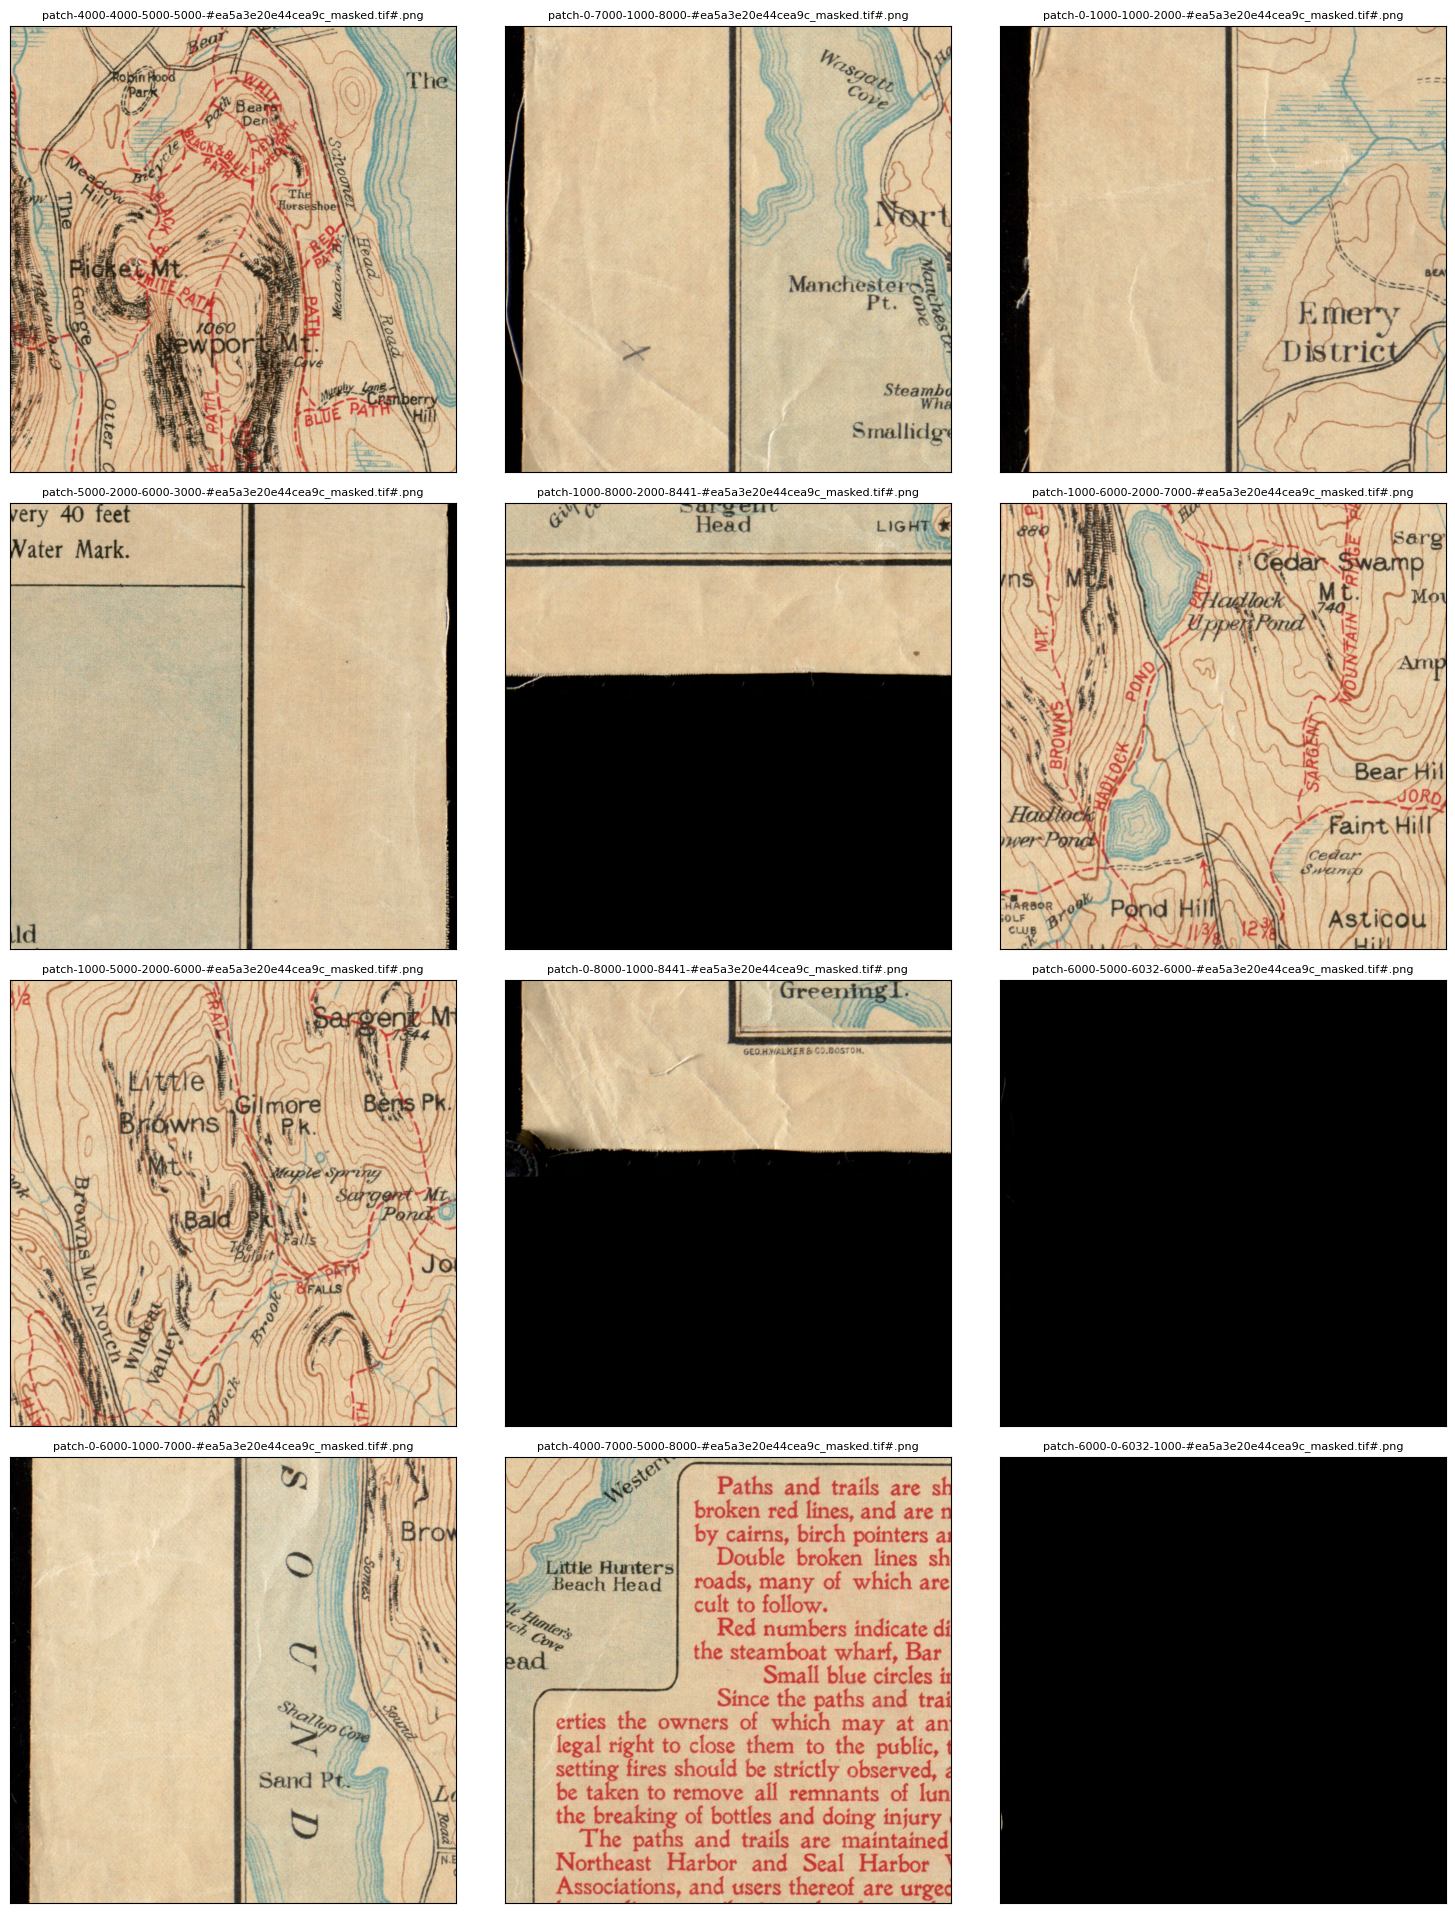

In [21]:
my_files.show_sample(num_samples=12, tree_level="patch")

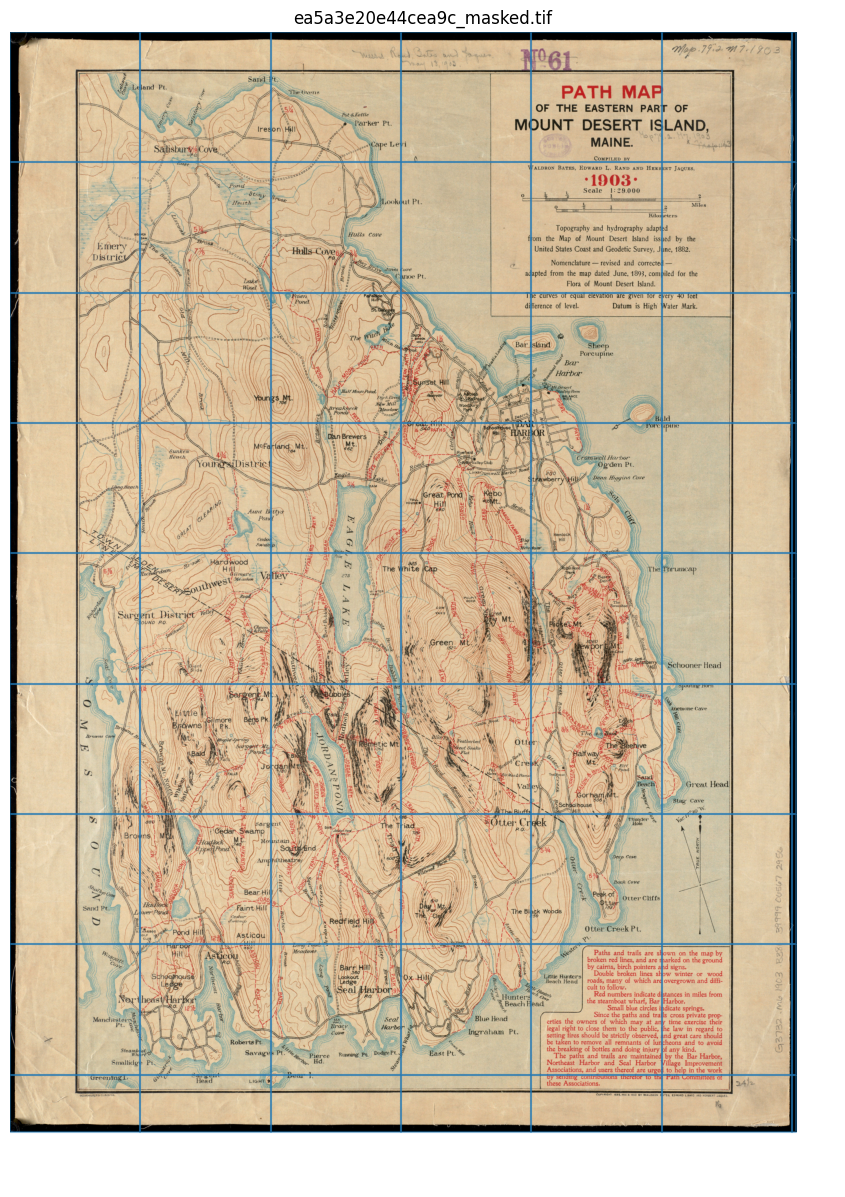

In [22]:
my_files.show_patches(
    parent_id=parent_list[0],
    figsize=(15, 15)
)

For georeferenced maps: Add coordinate increments for text spotting (1 degree latitude = X pixels)

In [23]:
my_files.add_coord_increments()

[INFO] Add coord-increments, tree level: parent


  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
parent_df, patch_df = my_files.convert_images(save=True)

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [26]:
parent_df.head()

parent_id  \
image_id                                
ea5a3e20e44cea9c_masked.tif      None   

                                                                    image_path  \
image_id                                                                         
ea5a3e20e44cea9c_masked.tif  /Users/kmcdonough/Github/MapReader_all/worksho...   

                                                                   coordinates  \
image_id                                                                         
ea5a3e20e44cea9c_masked.tif  (-68.32896796917277, 44.27516511365704, -68.14...   

                                   crs            shape  \
image_id                                                  
ea5a3e20e44cea9c_masked.tif  EPSG:4326  (8441, 6032, 3)   

                                                                      geometry  \
image_id                                                                         
ea5a3e20e44cea9c_masked.tif  POLYGON ((-68.14613 44.27517, -68.14613 44.445...   

                                                    name                id  \
image_id                                                                     
ea5a3e20e44cea9c_masked.tif  ea5a3e20e44cea9c_masked.tif  ea5a3e20e44cea9c   

                                                                      iiif_uri  \
image_id                                                                         
ea5a3e20e44cea9c_masked.tif  https://annotations.allmaps.org/images/f29ad52...   

                                                                       patches  \
image_id                                                                         
ea5a3e20e44cea9c_masked.tif  [patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked....   

                                dlon     dlat  
image_id                                       
ea5a3e20e44cea9c_masked.tif  0.00003  0.00002

In [27]:
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  ea5a3e20e44cea9c_masked.tif   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  ea5a3e20e44cea9c_masked.tif   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  ea5a3e20e44cea9c_masked.tif   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  ea5a3e20e44cea9c_masked.tif   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  ea5a3e20e44cea9c_masked.tif   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  /Users/kmcdonough/Github/MapReader_all/worksho...   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  /Users/kmcdonough/Github/MapReader_all/worksho...   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  /Users/kmcdonough/Github/MapReader_all/worksho...   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  /Users/kmcdonough/Github/MapReader_all/worksho...   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  /Users/kmcdonough/Github/MapReader_all/worksho...   

                                                              shape  \
image_id                                                              
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  (1000, 1000, 3)   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  (1000, 1000, 3)   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  (1000, 1000, 3)   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  (1000, 1000, 3)   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  (1000, 1000, 3)   

                                                             pixel_bounds  \
image_id                                                                    
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...     (0, 0, 1000, 1000)   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  (0, 1000, 1000, 2000)   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  (0, 2000, 1000, 3000)   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  (0, 3000, 1000, 4000)   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  (0, 4000, 1000, 5000)   

                                                                                          coordinates  \
image_id                                                                                                
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  (-68.32896796917277, 44.42559170155447, -68.29...   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  (-68.32896796917277, 44.405375791341136, -68.2...   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  (-68.32896796917277, 44.3851598811278, -68.298...   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  (-68.32896796917277, 44.36494397091446, -68.29...   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  (-68.32896796917277, 44.34472806070113, -68.29...   

                                                          crs  \
image_id                                                        
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  EPSG:4326   
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  EPSG:4326   
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  EPSG:4326   
patch-0-3000-1000-4000-#ea5a3e20e44cea9c_masked...  EPSG:4326   
patch-0-4000-1000-5000-#ea5a3e20e44cea9c_masked...  EPSG:4326   

                                                                                             geometry  
image_id                                                                                               
patch-0-0-1000-1000-#ea5a3e20e44cea9c_masked.ti...  POLYGON ((-68.29866 44.42559, -68.29866 44.445...  
patch-0-1000-1000-2000-#ea5a3e20e44cea9c_masked...  POLYGON ((-68.29866 44.40538, -68.29866 44.425...  
patch-0-2000-1000-3000-#ea5a3e20e44cea9c_masked...  POLYGON ((-68.29866 44.38516, -68.29866 44.405...  
pa

In [28]:
patch_list = my_files.list_patches()

## Detect Text

Here, we show how to load an already fine-tuned text spotting (detection & recognition) model and run the model inference on your patches.

In [44]:
import os

MAPTEXT_PATH = "./MapTextPipeline"
MAPTEXT_MODEL_PATH = os.getenv("MAPTEXT_MODEL_PATH")

In [45]:
# change these to your own paths, see the README for more details on how to get these

# https://github.com/maps-as-data/MapTextPipeline

cfg_file = f"{MAPTEXT_PATH}/final_rumsey.yaml"
weights_file = MAPTEXT_MODEL_PATH

In [47]:
# Set parameters for MapTextPipeline model

from mapreader import MapTextRunner

my_runner = MapTextRunner(
    patch_df,
    parent_df,
    cfg_file = cfg_file,
    weights_file = weights_file,
    device = "cpu",
)

### Run on all patches in the patch dataframe

Note: we've only loaded the first 10 rows of our patch dataframe to save time

In [48]:
patch_predictions = my_runner.run_all(return_dataframe=True)

  0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
patch_predictions.head()

In [ ]:
my_runner.show_predictions(
    patch_list[0],
    figsize=(15, 15),
    border_color="r",
    text_color="b",
    )

## Scale up to parent images

In [ ]:
parent_predictions = my_runner.convert_to_parent_pixel_bounds(return_dataframe=True)

In [ ]:
parent_predictions.head()

In [ ]:
my_runner.show_predictions(
    parent_list[0],
    figsize=(15, 15),
    border_color="r",
    text_color="b",
    )

## Concert pixel bounds to coordinates

In [ ]:
geo_predictions = my_runner.convert_to_coords(return_dataframe=True)

Saving these outputs will give you a geojson file you can load into a GIS software.

In [ ]:
my_runner.to_geojson("./example_output.geojson")